<a href="https://colab.research.google.com/github/ousmal/Openclassrooms_P7_Time_s-ries/blob/main/LO_P7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [64]:
path_1="/content/gdrive/MyDrive/Projet7/data.csv"
path_2="/content/gdrive/MyDrive/Projet7/store4_salses.csv"
data_1=pd.read_csv(path_1)
data_2=pd.read_csv(path_2)


In [99]:
data_1.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [100]:
data_1.shape

(3000888, 6)

In [101]:
data_1.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

In [102]:
data_1.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [104]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [132]:
data_2.head()

,date,sales
0,2017-01-01,0.00000
1,2017-01-02,708.67680
2,2017-01-03,547.86127
3,2017-01-04,527.43600
4,2017-01-05,402.13992


In [134]:
dataset=data_2.copy()


In [72]:
import datetime
df=data_2.copy()
df['Date'] = pd.to_datetime(df['date'])
df['year']= df['Date'].dt.year
df['month']= df['Date'].dt.month
df['day']= df['Date'].dt.day

In [73]:
df['month'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [74]:
df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M')
df.head()

,date,sales,Date,year,month,day,month_year
0,2017-01-01,0.00000,2017-01-01,2017,1,1,2017-01
1,2017-01-02,708.67680,2017-01-02,2017,1,2,2017-01
2,2017-01-03,547.86127,2017-01-03,2017,1,3,2017-01
3,2017-01-04,527.43600,2017-01-04,2017,1,4,2017-01
4,2017-01-05,402.13992,2017-01-05,2017,1,5,2017-01


In [67]:
df.drop_duplicates(subset="id", inplace=True)

In [68]:
df['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

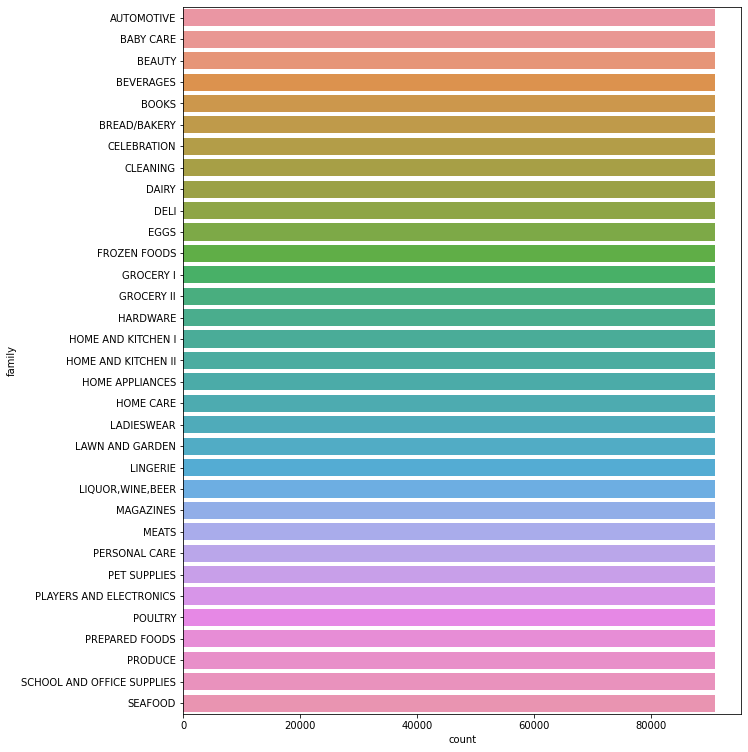

In [39]:
import seaborn as sns
plt.figure(figsize=(10,13))
sns.countplot(y="family",data=df)

In [75]:
#df=df[df['family']=='BOOKS']
df=df[df['day']==1]

In [70]:
df.shape

(3024, 11)

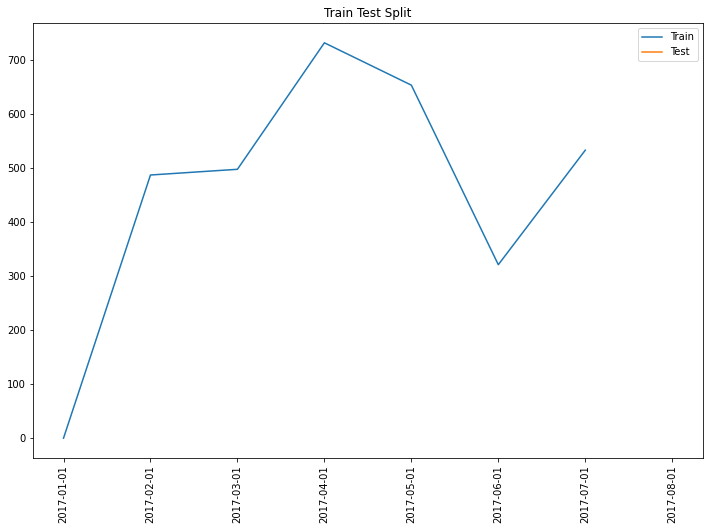

In [76]:
dataset = df.copy()
dataset['Month']=dataset['date']
total_data = dataset["Month"].count()
split = (total_data * 0.90).astype(np.int32)
train = dataset[0:split] 
test = dataset[split:]
plt.figure(figsize=(12,8))
plt.plot(train.Month, train.sales, label='Train')
plt.plot(test.Month, test.sales, label='Test')
plt.xticks(dataset["Month"], dataset["Month"], rotation='vertical')
plt.legend(loc='best')
plt.title("Train Test Split")
plt.show()